In [105]:
#import necessary stuff
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,Dropout,Flatten,MaxPooling2D
from sklearn.metrics import classification_report
import numpy as np



[9]


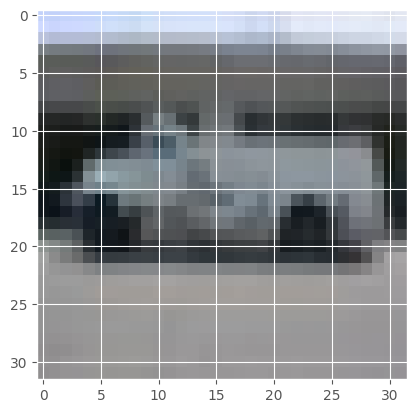

In [135]:
#load dataset

((x_Train,y_Train),(x_test,y_test))=tf.keras.datasets.cifar10.load_data()


#reshape dataset
image_index=110
print(y_Train[image_index])
plt.imshow(x_Train[image_index])









In [107]:

# x_Train=x_Train.astype("float32")
# x_test=x_test.astype("float32")

# x_Train/=255
# x_test/=255

# print("shape of X_train:",x_Train.shape)
# print("number of images in X_Train:",x_Train.shape[0])







9
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


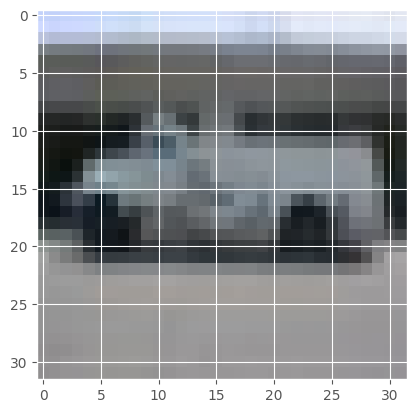

In [137]:

from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
import pandas as pd
train_df = pd.read_csv('C://Users//Chinmayee//Desktop//DL//oldlp4//LP-IV-datasets//CIFR//train.csv',nrows=2000)  # Update 'your_dataset.csv' with your actual file name


train_df.columns
# # Step 2: Extract pixel values and labels
trainX = train_df.drop('label', axis=1).values
trainy =train_df['label'].values


newtrainX=trainX.reshape((-1,32,32,3),order='F')

rotated_images = np.empty_like(newtrainX)

# Apply 270-degree counterclockwise rotation using a for loop
for i in range(len(newtrainX)):
    rotated_images[i] = np.rot90(newtrainX[i], k=3)


mirrored_images = np.empty_like(rotated_images)

for i in range(len(rotated_images)):
   
    mirrored_images[i] = np.fliplr(rotated_images[i])




plt.imshow(mirrored_images[110])



mirrored_images=mirrored_images.astype("float32")
mirrored_images=mirrored_images/255.0
print(trainy[110])


newtrainy=to_categorical(trainy,num_classes=10)
print(newtrainy[110])

# X_train, X_test, y_train, oldy_test = train_test_split(mirrored_images, trainy, test_size=0.2, random_state=42)

# X_train=X_train.astype("float32")
# X_test=X_test.astype("float32")

# X_train/=255
# X_test/=255


# y_train=to_categorical(y_train,num_classes=10)
# y_test=to_categorical(oldy_test,num_classes=10)




# print(y_test[9])
# print(trainy[9])
# print(oldy)





In [138]:
# import pandas as pd
# Z=np.array([1,2,3,4,5,6,7,8,9,10,11,12])

# Z=Z.reshape(-1,2,2,3)




# print(Z.shape)
# print(Z)


In [139]:
#build model
model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3),input_shape=(32,32,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128,activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])
model.summary()


#compile model





Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 flatten_4 (Flatten)         (None, 7200)              0         
                                                                 
 dense_8 (Dense)             (None, 128)               921728    
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                                 
 dense_9 (Dense)             (None, 10)                1290      
                                                      

In [140]:
#fit model
batch_size=128
epochs=25
history=model.fit(x=mirrored_images,y=newtrainy,batch_size=batch_size,epochs=epochs)




Epoch 1/25
16/16 [==============================] - 3s 83ms/step - loss: 2.3308 - accuracy: 0.1530
Epoch 2/25
16/16 [==============================] - 1s 80ms/step - loss: 2.0454 - accuracy: 0.2520
Epoch 3/25
16/16 [==============================] - 1s 82ms/step - loss: 1.8962 - accuracy: 0.3310
Epoch 4/25
16/16 [==============================] - 1s 88ms/step - loss: 1.7970 - accuracy: 0.3725
Epoch 5/25
16/16 [==============================] - 1s 77ms/step - loss: 1.6923 - accuracy: 0.4095
Epoch 6/25
16/16 [==============================] - 1s 78ms/step - loss: 1.6188 - accuracy: 0.4460
Epoch 7/25
16/16 [==============================] - 1s 76ms/step - loss: 1.5410 - accuracy: 0.4625
Epoch 8/25
16/16 [==============================] - 1s 76ms/step - loss: 1.4729 - accuracy: 0.4790
Epoch 9/25
16/16 [==============================] - 1s 80ms/step - loss: 1.4009 - accuracy: 0.5155
Epoch 10/25
16/16 [==============================] - 1s 77ms/step - loss: 1.3312 - accuracy: 0.5580
Epoch 11/

In [141]:
#evaluate model loss acc

print("evaluating network.....")
predictions=model.predict(mirrored_images,batch_size=128)
print(predictions.shape)
print(newtrainy.shape)



evaluating network.....


16/16 [==============================] - 1s 27ms/step
(2000, 10)
(2000, 10)


In [142]:
print(classification_report(trainy,predictions.argmax(axis=1)))




              precision    recall  f1-score   support

           0       0.96      0.99      0.98       202
           1       1.00      0.99      1.00       191
           2       0.99      0.95      0.97       203
           3       0.98      0.99      0.98       195
           4       0.97      0.98      0.97       214
           5       0.99      0.99      0.99       183
           6       1.00      0.99      0.99       207
           7       0.99      0.99      0.99       199
           8       0.98      0.98      0.98       203
           9       1.00      1.00      1.00       203

    accuracy                           0.99      2000
   macro avg       0.99      0.99      0.99      2000
weighted avg       0.99      0.99      0.99      2000



dict_keys(['loss', 'accuracy'])


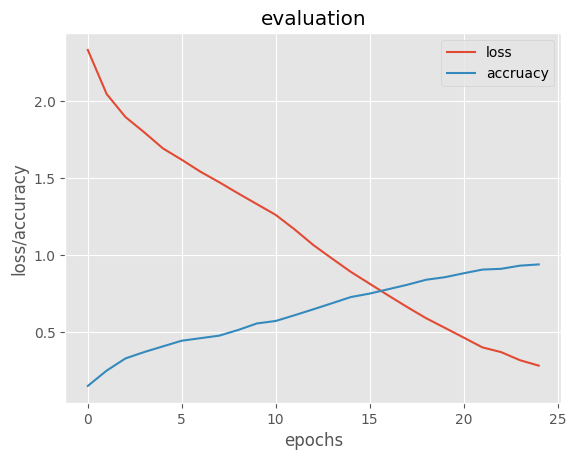

In [143]:
print(history.history.keys())
#plot model

plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0,25),history.history["loss"],label="loss")
plt.plot(np.arange(0,25),history.history["accuracy"],label="accruacy")
plt.xlabel("epochs")
plt.ylabel("loss/accuracy")
plt.title("evaluation")
plt.legend()






1/1 [==============================] - 0s 141ms/step
[4]
4


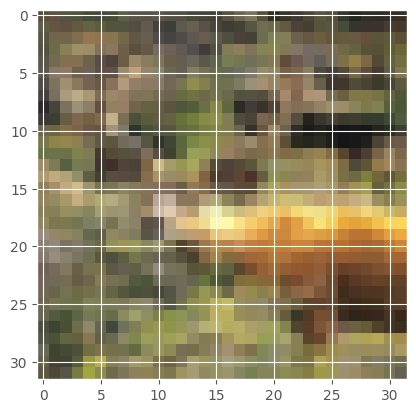

In [145]:
#predict actual data
image_index=98
plt.imshow(mirrored_images[image_index])


x_pred=mirrored_images[image_index].reshape((1,32,32,3))
x_pred.shape
pred=model.predict(x_pred)
print(pred.argmax(axis=1))
print(trainy[image_index])
